# E-Mail Spam Classifier using Support Vector Machines

This notebook is an implementation of E-Mail Spam Classifier using Support Vector Machines (SVMs). In the first half, we will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets
will give us an intuition of how SVMs work and how to use a Gaussian
kernel with SVMs. In the next half, we will be using support
vector machines to build a spam classifier.

### What are SVMs?

SVMs are a class of supervised learning algorithm that builds a representation of the examples in the training data as points in space, mapped so that the examples belonging to each class in the data are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a class based on which side of the gap they fall on. **SVMs are a binary classifcation tool by default, although there are ways to use them in multi-class scenarios.** SVMs can also handle non-linear classification using something called the kernel trick to project the data into a high-dimensional space before attempting to find a hyperplane. SVMs are a powerful class of algorithms and are used often in practical machine learning applications

Lets import a 2D dataset and start exploring the data:

In [57]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.optimize as opt
from scipy.io import loadmat
from scipy.optimize import minimize

from mpl_toolkits import mplot3d

from IPython.core.debugger import set_trace
from IPython.display import Image

from sklearn.preprocessing import OneHotEncoder
from sklearn import svm 

%matplotlib inline

In [58]:
# Load the dataset
dataset = loadmat('data1.mat')

In [59]:
# Get X and y from the 'dataset' dictionary
X = dataset['X']
y = dataset['y']
X.shape, y.shape

((51, 2), (51, 1))

In [60]:
# Create dataframe 'df' using X and y
df = pd.DataFrame(X, columns=['X1', 'X2'])  
df['y'] = y

# Print top 5 rows of df
df.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


### Visualizing and Modeling first dataset

We will begin with a 2D example dataset which can be separated by a linear boundary. In this dataset, the positions of the positive examples (Red points on the plot) and the negative examples (Blue points on the plot) suggest a natural separation indicated by the gap. However, there is an outlier positive example on the far left at about (0.1, 4.1). We need to handle this outlier before building the classifier.

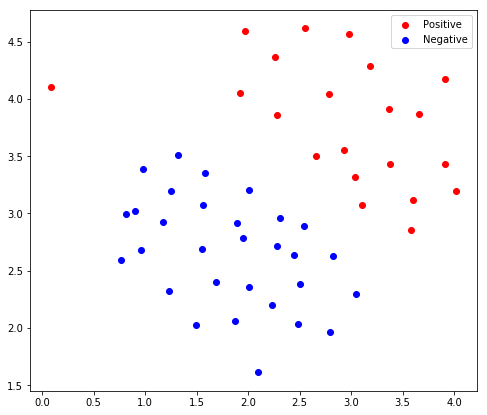

In [61]:
negative = df[df['y']==0]
positive = df[df['y']==1]

fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(positive['X1'], positive['X2'], c='r', marker='o', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], c='b', marker='o', label='Negative')  

ax.legend(loc='upper right')

plt.show()

Lets train a linear support vector machine to learn the class boundary. Here, we will be using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to 1/λ , where  λ  is the regularization parameter that we use for logistic regression.

**For the first experiment we will use C=1 and see how the model performs**

In [62]:
# Create a LinearSVC object since we are building a linear decision boundary
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)  
svc1

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [65]:
# Train and score the model 
svc1.fit(df[['X1', 'X2']], df['y'])  
score1 = svc1.score(df[['X1', 'X2']], df['y'])
print('Classification Accuracy at "C=1" is {0}%'.format(score1*100))

Classification Accuracy is 98.0392156862745%


**Now, lets use C=100 and check the performance of the model**

In [72]:
# Train and Score the second model at C=100
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)  
svc2.fit(df[['X1', 'X2']], df['y'])  
score2 = svc2.score(df[['X1', 'X2']], df['y'])
print('Classification Accuracy at "C=100" is {0}%'.format(score2*100))

Classification Accuracy at "C=100" is 100.0%


When C=1, the classifier is not 100% accurate because of the outlier in the dataset. The classifier does not classify the outlier correctly which can be seen from the plot ("Confidence for svc1") below. 

When C = 100, we see that the SVM classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data. We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

In [73]:
# Add a column to df to show confidence interval for svc1
df['SVC1_Confidence'] = svc1.decision_function(df[['X1', 'X2']])

# Print first 5 rows of the updated dataframe
df.head()

,X1,X2,y,SVC1_Confidence
0,1.9643,4.5957,1,0.797159
1,2.2753,3.8589,1,0.380010
2,2.9781,4.5651,1,1.372087
3,2.9320,3.5519,1,0.518108
4,3.5772,2.8560,1,0.332086


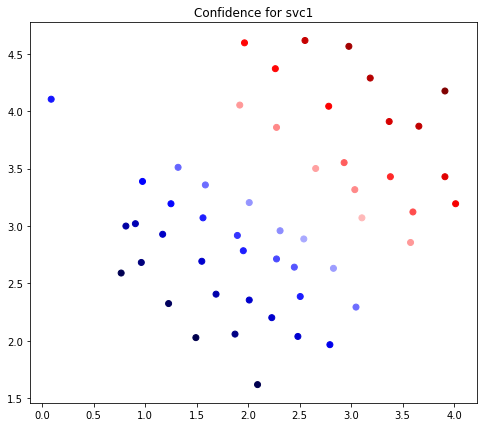

In [75]:
fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(df['X1'], df['X2'], c=df['SVC1_Confidence'], cmap='seismic')  

plt.title('Confidence for svc1')
plt.show()

In [76]:
# Add a column to df to show confidence interval for svc2
df['SVC2_Confidence'] = svc2.decision_function(df[['X1', 'X2']])

# Print first 5 rows of the updated dataframe
df.head()

,X1,X2,y,SVC1_Confidence,SVC2_Confidence
0,1.9643,4.5957,1,0.797159,3.764824
1,2.2753,3.8589,1,0.380010,1.835744
2,2.9781,4.5651,1,1.372087,4.785226
3,2.9320,3.5519,1,0.518108,1.611551
4,3.5772,2.8560,1,0.332086,0.176005


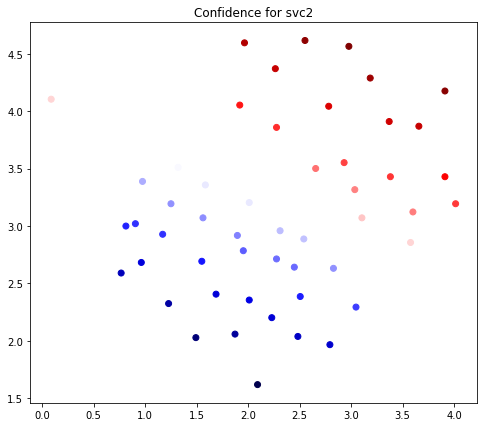

In [77]:
fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(df['X1'], df['X2'], c=df['SVC2_Confidence'], cmap='seismic')  

plt.title('Confidence for svc2')
plt.show()

The difference is a bit subtle but the color of the points near the boundary tells the story. In the first image the points near the boundary are a strong red or blue, indicating that they're a solid distance from the hyperplane. This is not the case in the second image, where a number of points are nearly white, indicating that they are directly adjacent to the hyperplane

## SVM with Gaussian Kernels

Now lets use SVMs to do non-linear classification. We will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. The Gaussian kernel is a similarity function that measures the "distance" between a pair of examples, $(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0)
as the examples are further apart. 

The Gaussian Kernel function is defined as:

$$ K_{gaussian}(x^{(i)}, x^{(j)}) = exp \Bigg(- \frac{\sum_{K=1}^{n} (x_k^{(i)}-x_k^{(j)})^2}{2\sigma^2}  \Bigg) $$

In [78]:
# Define a gaussian kernel function
def gaussian_kernel(x1, x2, sigma):  
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

We can test our kernel function on two provided examples as follows:

In [79]:
x1 = np.array([1.0, 2.0, 1.0])  
x2 = np.array([0.0, 4.0, -1.0])  
sigma = 2  
gaussian_kernel(x1, x2, sigma)

0.32465246735834974

### Visualizing and Modeling second dataset

Now lets load the second dataset and follow the same steps that were completed with the first dataset. 

In [80]:
dataset2 = loadmat('data2.mat')
X2 = dataset2['X']
y2 = dataset2['y']
X2.shape, y2.shape

((863, 2), (863, 1))

In [81]:
# Create dataframe df2 using X2 and y2
df2 = pd.DataFrame(X2, columns=['X1', 'X2'])  
df2['y'] = y2

# Print first 5 rows of the dataset
df2.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


Now we will plot the data to see how the data is scattered

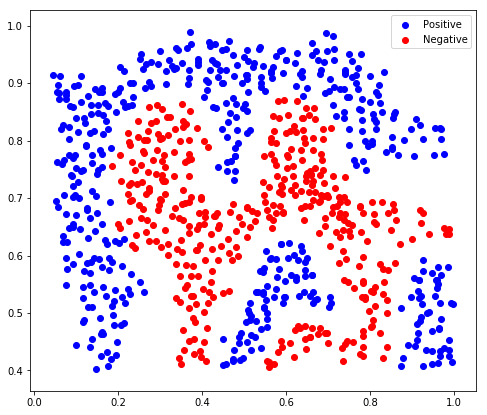

In [82]:
negative2 = df2[df2['y']==0]
positive2 = df2[df2['y']==1]

fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(positive2['X1'], positive2['X2'], c='b', marker='o', label='Positive')  
ax.scatter(negative2['X1'], negative2['X2'], c='r', marker='o', label='Negative')  

ax.legend(loc='upper right')

plt.show()

From the figure, we can see that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, we will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset.

For this dataset we will build a support vector machine classifier using the **built-in RBF (gaussian) kernel** and examine its accuracy on the training data. 

In [83]:
# Build the classifier
svc3 = svm.SVC(C=100, gamma=10, probability=True)  

# Fit the data
svc3.fit(df2[['X1', 'X2']], df2['y'])

# Create a new column in the dataframe to show predicted probability
df2['Probability'] = svc3.predict_proba(df2[['X1', 'X2']])[:,0]

# Print first 5 rows of the dataset
df2.head()

,X1,X2,y,Probability
0,0.107143,0.603070,1,3.000001e-14
1,0.093318,0.649854,1,3.000001e-14
2,0.097926,0.705409,1,3.000001e-14
3,0.155530,0.784357,1,4.915682e-07
4,0.210829,0.866228,1,4.928299e-03


To visualize the decision boundary, this time we will shade the points based on the predicted probability. We can see from the result that it gets most of them right.

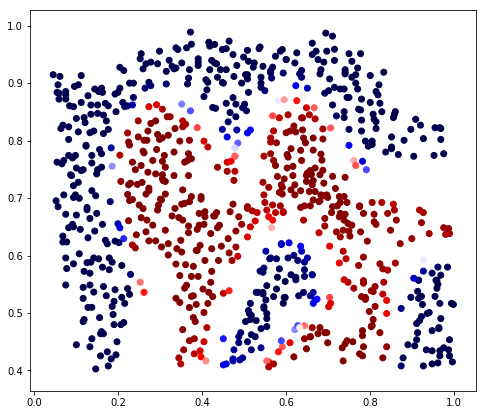

In [84]:
fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(df2['X1'], df2['X2'], c=df2['Probability'], cmap='seismic')  

plt.show()

Lets change the values of C and sigma and see how well the model fits the data.

In [85]:
# Build the classifier
svc4 = svm.SVC(C=1, gamma=0.1, probability=True)  

# Fit the data
svc4.fit(df2[['X1', 'X2']], df2['y'])  

# Create a new column in the dataframe to show predicted probability
df2['Probability_2'] = svc4.predict_proba(df2[['X1', 'X2']])[:,0]

# Print first 5 rows of the dataset
df2.head()

,X1,X2,y,Probability,Probability_2
0,0.107143,0.603070,1,3.000001e-14,0.434340
1,0.093318,0.649854,1,3.000001e-14,0.419463
2,0.097926,0.705409,1,3.000001e-14,0.404879
3,0.155530,0.784357,1,4.915682e-07,0.391083
4,0.210829,0.866228,1,4.928299e-03,0.374166


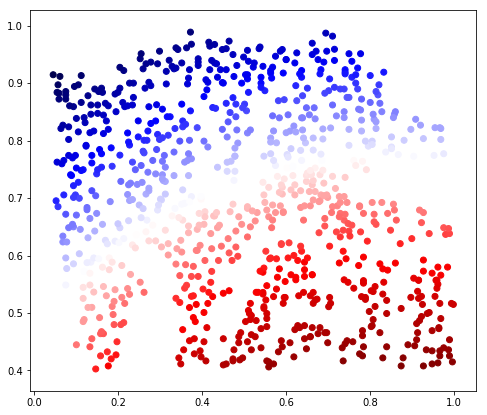

In [86]:
fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(df2['X1'], df2['X2'], c=df2['Probability_2'], cmap='seismic')  

plt.show()

We can see from the above figure that selection of C and sigma plays a major role in the selection of a model. In this case (where C=1 and sigma=0.1), the model is not doing a good job of classifying positive and negative points. 

We could use scikit-learn's built-in grid search to find **optimal hyper-parameters (C and sigma)** for an SVM model based on validation set performance.

**Lets implement a simple grid search from scratch using the third dataset**

### Visualizing and Modeling third dataset

Now lets load the third dataset and see how to use a SVM with a Gaussian kernel.

In [87]:
dataset3 = loadmat('data3.mat')
dataset3

{'X': array([[ -1.58986000e-01,   4.23977000e-01],
        [ -3.47926000e-01,   4.70760000e-01],
        [ -5.04608000e-01,   3.53801000e-01],
        [ -5.96774000e-01,   1.14035000e-01],
        [ -5.18433000e-01,  -1.72515000e-01],
        [ -2.92627000e-01,  -2.07602000e-01],
        [ -1.58986000e-01,  -4.38596000e-02],
        [ -5.76037000e-02,   1.43275000e-01],
        [ -7.14286000e-02,   2.71930000e-01],
        [ -2.97235000e-01,   3.47953000e-01],
        [ -4.17051000e-01,   2.01754000e-01],
        [ -4.40092000e-01,   8.77193000e-03],
        [ -3.24885000e-01,  -3.21637000e-02],
        [ -2.46544000e-01,   5.55556000e-02],
        [ -2.18894000e-01,   2.01754000e-01],
        [ -3.43318000e-01,   1.60819000e-01],
        [ -5.09217000e-01,   7.89474000e-02],
        [ -3.84793000e-01,  -9.06433000e-02],
        [ -1.49770000e-01,   1.25731000e-01],
        [ -1.95853000e-01,   3.24561000e-01],
        [ -3.91705000e-02,  -2.19298000e-01],
        [ -1.08295000e-01,  -

In [88]:
X3 = dataset3['X']
y3 = dataset3['y']
Xval3 = dataset3['Xval']
yval3 = dataset3['yval']
X3.shape, y3.shape, Xval3.shape, yval3.shape

((211, 2), (211, 1), (200, 2), (200, 1))

In the provided dataset, we are given the variables **X, y, Xval, yval**. Lets visualize the dataset:

In [89]:
# Create dataframe df3 using X and y
df3 = pd.DataFrame(X3, columns=['X1', 'X2'])  
df3['y'] = y3

# Print first 5 rows of the dataset
df3.head()

,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


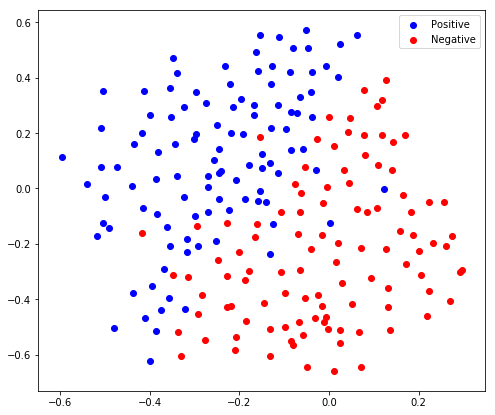

In [90]:
negative3 = df3[df3['y']==0]
positive3 = df3[df3['y']==1]

fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(positive3['X1'], positive3['X2'], c='b', marker='o', label='Positive')  
ax.scatter(negative3['X1'], negative3['X2'], c='r', marker='o', label='Negative')  

ax.legend(loc='upper right')

plt.show()

Our task is to use the cross validation set **Xval, yval** to determine the best C and sigma parameters to use. For both C and sigma, we can try values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). We have to try all possible pairs of values for C and sigma. For example, if we try each of the 8 values listed above for C and for $\sigma$, we would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models.

Lets get to the code:

In [91]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]  
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0  
best_params = {'C': None, 'gamma': None}

for C in C_values:  
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X3, y3.ravel())
        score = svc.score(Xval3, yval3.ravel())

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

# Print the best score and the best parameters
best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

Now, lets use these parameters to train our SVM classifier.

In [92]:
# Build the classifier
svc_optimal = svm.SVC(C=0.3, gamma=100, probability=True)  

# Fit the data
svc_optimal.fit(df3[['X1', 'X2']], df3['y'])  

# Create a new column in the dataframe to show predicted probability
df3['Probability'] = svc_optimal.predict_proba(df3[['X1', 'X2']])[:,0]

# Print first 5 rows of the dataset
df3.head()

,X1,X2,y,Probability
0,-0.158986,0.423977,1,0.036433
1,-0.347926,0.470760,1,0.088408
2,-0.504608,0.353801,1,0.141951
3,-0.596774,0.114035,1,0.127243
4,-0.518433,-0.172515,1,0.066781


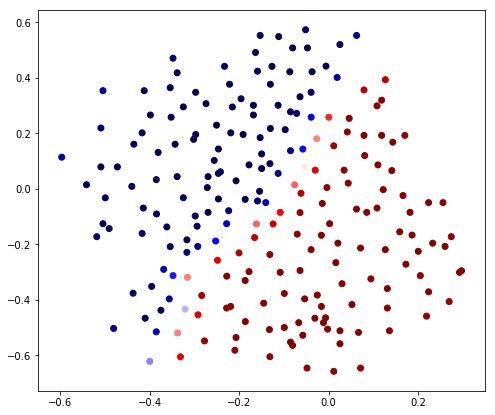

In [93]:
fig, ax = plt.subplots(figsize=(8,7))  
ax.scatter(df3['X1'], df3['X2'], c=df3['Probability'], cmap='seismic')  

plt.show()

For our best parameters, the SVM returned a decision boundary shown in figure above. We can see that the boundary is not exactly linear which is why we needed a gaussian kernel.

**Now lets use the knowledge that we gained on SVM to build a spam classifier**

# SPAM Classification using SVM

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. Here, we will use SVMs to build our own spam filter.

We will be training a classifier to classify whether a given email, X, is spam (y = 1) or non-spam (y = 0). In particular, we need to convert each email into a feature vector ** $x \in  R^n $ **. The following parts show how such a feature vector can be constructed from an email.

## Pre-processing Emails

![title](sample_email.png)


Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. The above figure shows a sample email that contains a URL, an email address (at the end), numbers, and dollar amounts. While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g.,
the specific URL or specific dollar amount) will be different in almost every email. Therefore, one method often employed in processing emails is to "normalize" these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the email with the unique string "httpaddr" to indicate that a URL was present.

This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small.

The following are the steps to be carried out for email preprocessing and normalization:

    *  Lower-casing: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).
    * Stripping HTML: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
    * Normalizing URLs: All URLs are replaced with the text "httpaddr".
    * Normalizing Email Addresses: All email addresses are replaced with the text "emailaddr".
    * Normalizing Numbers: All numbers are replaced with the text "number".
    * Normalizing Dollars: All dollar signs are replaced with the text "dollar".
    * Word Stemming: Words are reduced to their stemmed form. For example, "discount", "discounts", "discounted" and "discounting" are all replaced with "discount". Sometimes, the Stemmer actually strips off additional characters from the end, so "include", "includes", "included", and "including" are all replaced with "includ".
    * Removal of non-words: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

The result of these preprocessing steps is shown in the figure below. While pre-processing has left word fragments and non-words, this form turns out to be much easier to work with for performing feature extraction.

![title](processed_email.png)


### Vocabulary List and Word Indices

![title](Vocab_WordIndices.png)

After preprocessing the emails, we have a list of words for each email. The next step is to choose which words we would like to use in our classifier and which we would want to leave out.

For this exercise, we have chosen only the most frequently occuring words as our set of words considered (the vocabulary list). Since words that occur rarely in the training set are only in a few emails, they might cause the model to overfit our training set. The complete vocabulary list is in the file "vocab.txt". Our vocabulary list was selected by choosing all words which occur at least a 100 times in the spam corpus, resulting in a list of 1899 words. In practice, a vocabulary list with about 10,000 to 50,000 words is often used.

Given the vocabulary list, we can now map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocabulary list. Specifically, in the sample email, the word "anyone" was first normalized to "anyon" and then mapped onto the index 86 in the vocabulary list.

If we are given a string "str" which is a single word from the processed email, we have to look up the word in the vocabulary
list "vocabList" and find if the word exists in the vocabulary list. If the word exists, we should add the index of the word into the word indices variable. If the word does not exist, and is therefore not in the vocabulary, we can skip the word. This is the process to update word indices.

### Extracting Features from Emails

Next, feature extraction is done, that converts each email into
a vector in $R^n$. We have to use n = # of words in vocabulary
list. Specifically, the feature $x_i \in {0,1}$ for an email corresponds to whether
the i-th word in the dictionary occurs in the email. That is, $x_i$ = 1 if the i-th
word is in the email and $x_i$ = 0 if the i-th word is not present in the email.

Thus, for a typical email, this feature would look like:

![title](vector.png)

Once the feature vector is created using the word indices, we can go ahead and train the model.

## Training SVM for Spam Classifications

After the feature extraction process is completed, the next step is to load a preprocessed training dataset that will be used to train a SVM classifier. "spamTrain.mat" contains 4000 training examples of spam and non-spam email, while spamTest.mat contains 1000 test examples. Each original email has gone through the feature extraction process and has been and converted into a vector ** $x^{(i)} \in  R^{1899} $ **.

After loading the dataset, we will proceed to train a SVM to classify between spam (y = 1) and non-spam (y = 0) emails.

In [94]:
spam_train = loadmat('spamTrain.mat')  
spam_test = loadmat('spamTest.mat')

spam_train 

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [95]:
spam_test

{'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011',
 '__version__': '1.0',
 'ytest': array([[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
     

In [96]:
X_train = spam_train['X']
y_train = spam_train['y']
X_test = spam_test['Xtest']
y_test = spam_test['ytest']

# Print the shapes of training and test datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

Each document has been converted to a vector with 1,899 dimensions corresponding to the 1,899 words in the vocabulary. The values are binary, indicating the presence or absence of the word in the document.

### Training and Testing the classifier

In [97]:
# Train the SVM classifier
svc_spam = svm.SVC(C=100, gamma=0.01)  
svc_spam.fit(X_train, y_train.ravel()) 

#Print Accuracy on test dataset
print('Test accuracy = {0}%'.format(np.round(svc_spam.score(X_test, y_test.ravel()) * 100, 2)))

Test accuracy = 98.5%
